# FakeNewsNet

**Note:** In this jupyter notebook, we are joining 4 files (two news sources, fake and real for each) provided by source of the dataset (see README for more information). Before concatenating, `label` attribute is added according to news stored in that file (e.g. dataframe of `gossipcop_fake.csv` file will contain column `label` with only value `fake`).

**Note2:** This is not full version of the dataset! In dataset source repository, you can find the way how to download even news content.

## Setup and import libraries

In [1]:
# Automatically reloading imported modules
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import *

pd.set_option('display.max_columns', None)

In [3]:
# Change design of plots
sns.set(style="whitegrid")

# Change sizes and resolution of plots
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [4]:
df_gossipcop_fake = pd.read_csv('data/gossipcop_fake.csv')
df_gossipcop_real = pd.read_csv('data/gossipcop_real.csv')
df_politifact_fake = pd.read_csv('data/politifact_fake.csv')
df_politifact_real = pd.read_csv('data/politifact_real.csv')

add_column_mapping = {
    'fake': [df_gossipcop_fake, df_politifact_fake],
    'real': [df_gossipcop_real, df_politifact_real]
}

for key, dataframes in add_column_mapping.items():
    for df in dataframes:
        df['label'] = key

df = pd.concat([df_gossipcop_fake, df_gossipcop_real, df_politifact_fake, df_politifact_real], ignore_index=True)

## General descriptive analysis

Let's check shape of the data - number of rows and attributes:

In [5]:
df.shape

(23196, 5)

Overview of the data:

In [6]:
df.head()

,id,news_url,title,tweet_ids,label
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,fake
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,fake
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,fake
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,fake
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,fake


### Datatypes

**Note:** Be careful, attributes with only NaN values are considered as `float64` type by default.

In [7]:
df.dtypes

id           object
news_url     object
title        object
tweet_ids    object
label        object
dtype: object

### Basic characteristics

In [8]:
df.describe()

,id,news_url,title,tweet_ids,label
count,23196,22866,23196,21695,23196
unique,23194,21658,21724,21597,2
top,politifact14920,https://www.thewrap.com/this-is-us-everything-...,Connecting People Through News,900336607680761857\t900407896072216576\t900412...,real
freq,2,11,20,6,17441


In [9]:
df.describe(exclude=[np.number])

,id,news_url,title,tweet_ids,label
count,23196,22866,23196,21695,23196
unique,23194,21658,21724,21597,2
top,politifact14920,https://www.thewrap.com/this-is-us-everything-...,Connecting People Through News,900336607680761857\t900407896072216576\t900412...,real
freq,2,11,20,6,17441


### One-value columns

Which attributes contain only one value?

In [10]:
one_value_attributes_analysis(df)

### Missing values

Analysis of missing values in attributes:

news_url: 330 (1.42%)
tweet_ids: 1501 (6.47%)

Missing values plot (inverse logic, plot is showing how many values are not NaN):


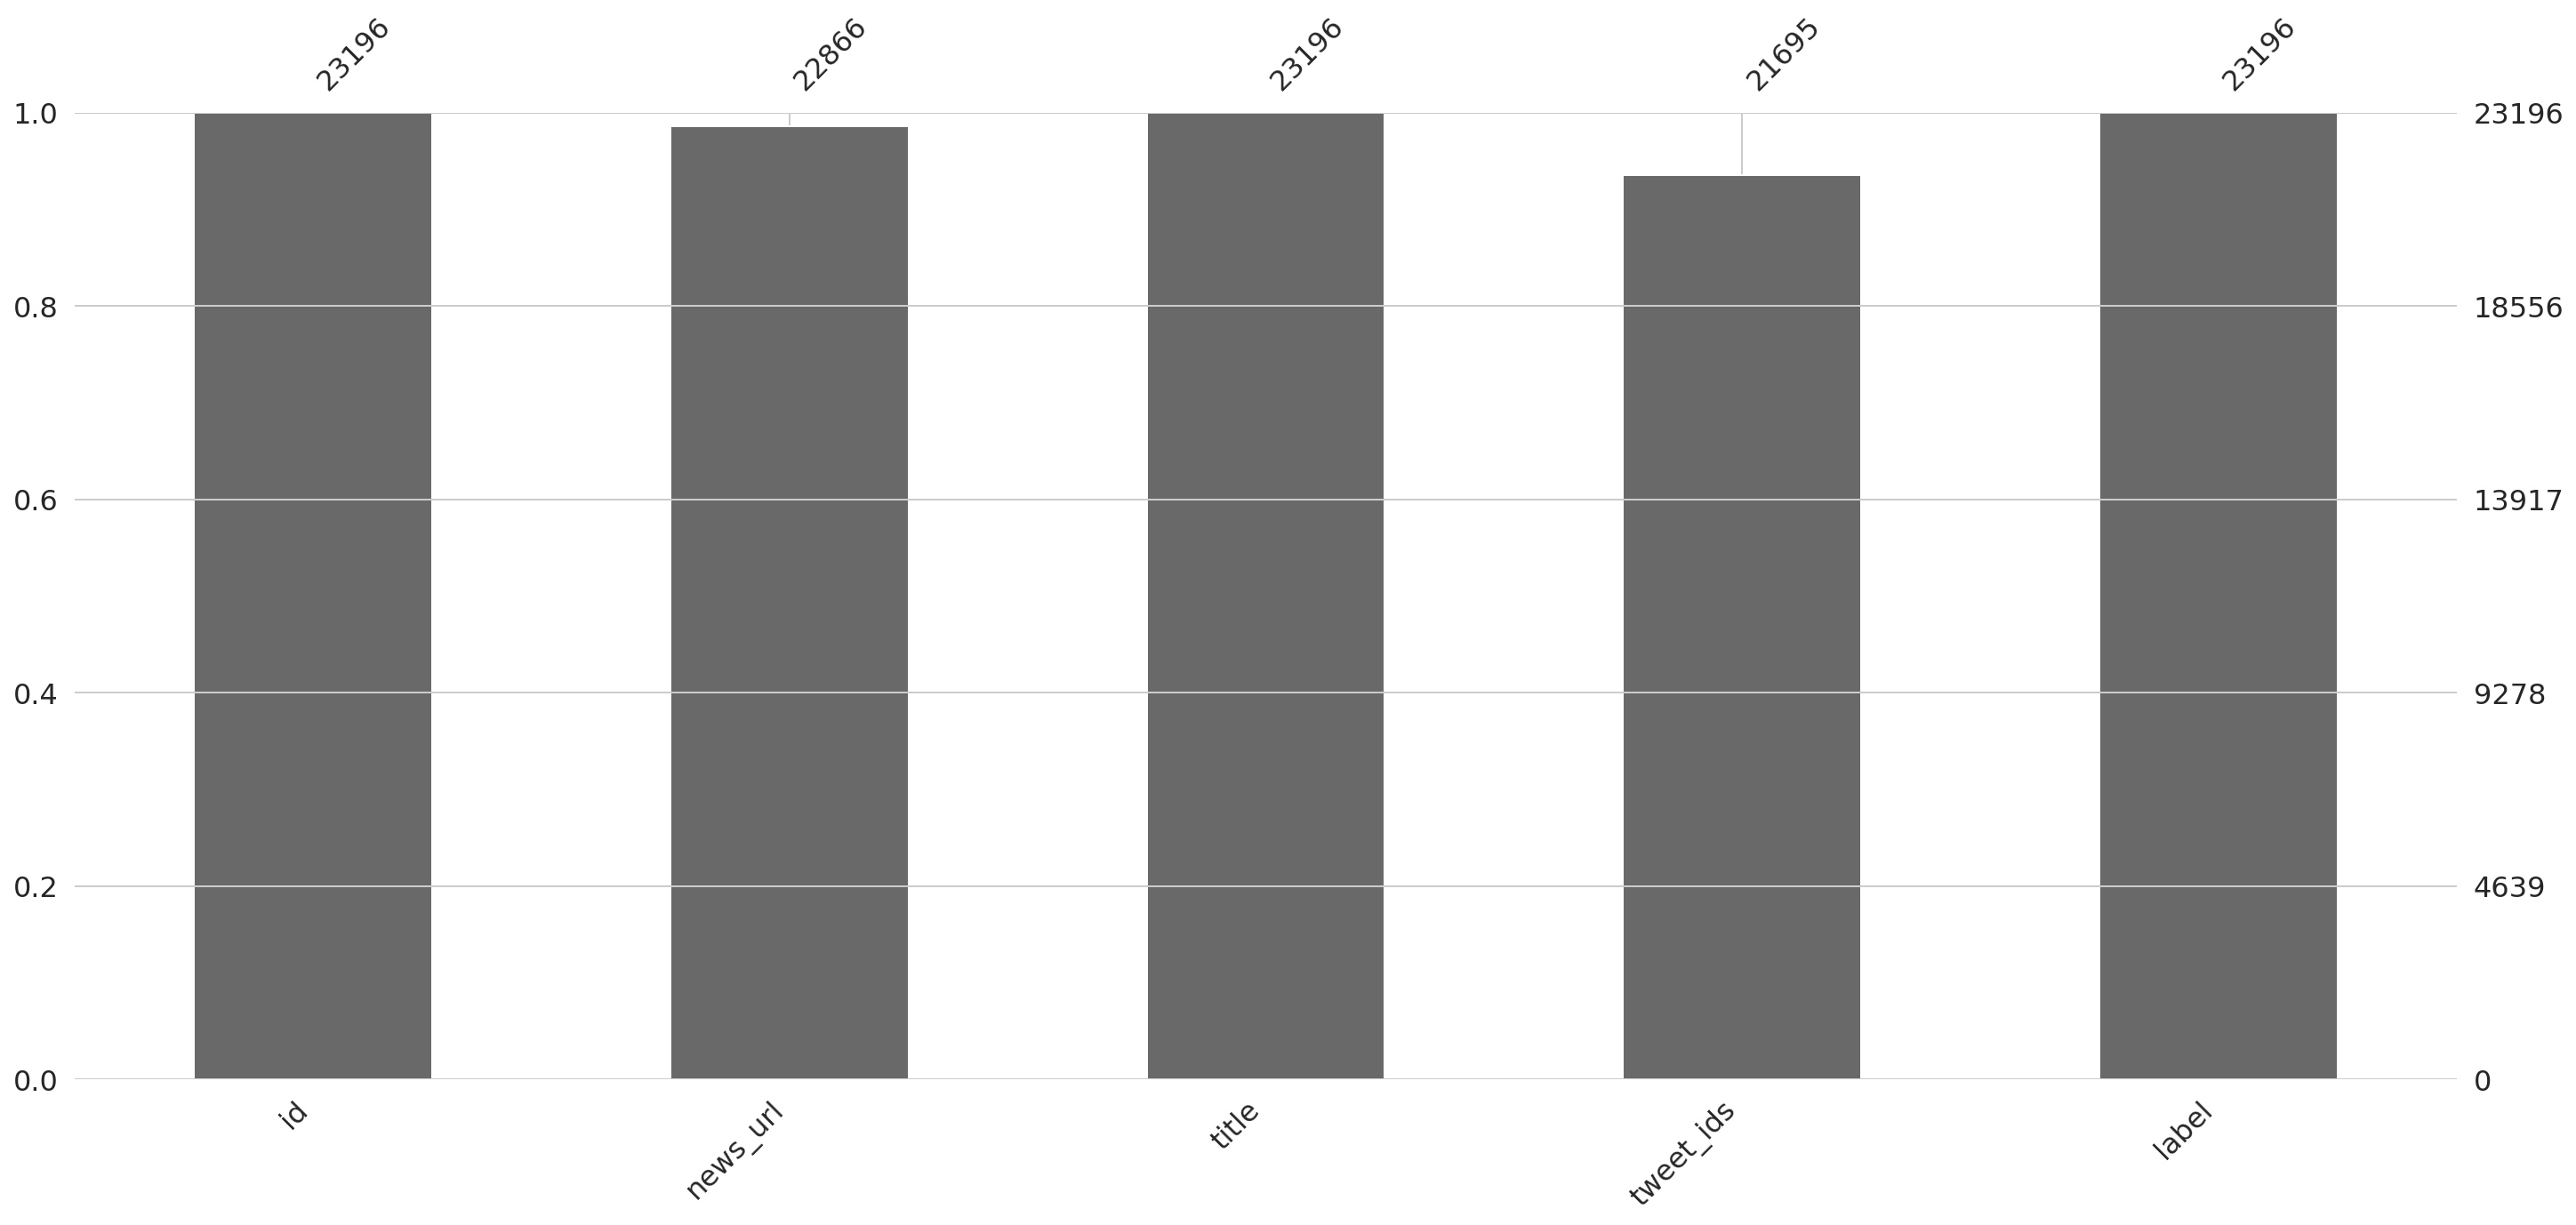

In [11]:
missing_values_analysis(df)

### Duplicates

Are there any duplicates?

In [12]:
df.duplicated().any()

False

## Attributes analysis

Analysis of all attributes:

In [13]:
skip_attributes = [
    'id', 'tweet_ids'
] # attributes to skip in analysis (e.g. id)

textual_attributes = [
    'title', 'news_url'
] # attributes with text values (e.g. content of article)
textual_attributes = list(filter(lambda value: value not in skip_attributes, textual_attributes))

numerical_attributes = list(df.select_dtypes([np.number]).columns)
numerical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, numerical_attributes))

categorical_attributes = list(df.select_dtypes(['object', 'category', 'bool']).columns)
categorical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, categorical_attributes))

label_column = 'label' # attribute considered as "label"

### Label attribute distribution

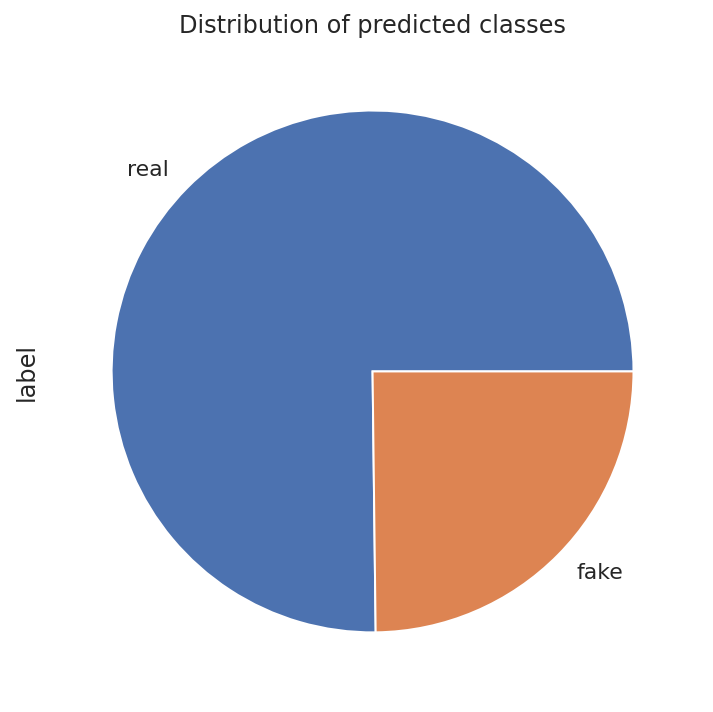

In [14]:
df[label_column].value_counts().plot(kind='pie', title='Distribution of predicted classes');

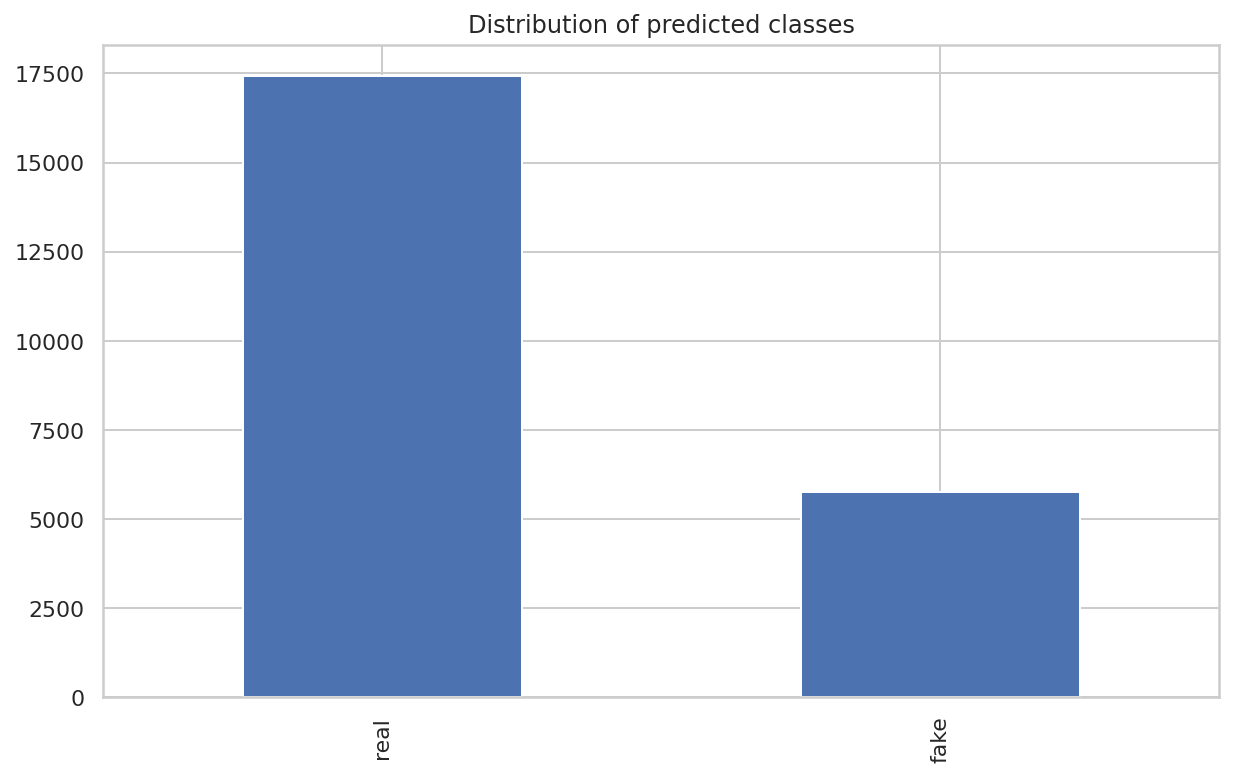

In [15]:
df[label_column].value_counts().plot(kind='bar', title='Distribution of predicted classes');

### Numerical attributes

Analysis of numerical attributes:

In [16]:
analyse_numerical_attributes(df, label_column, numerical_attributes)

There are no attributes to be analysed.


### Categorical attributes

Analysis of categorical attributes:

In [17]:
analyse_categorical_attributes(df, label_column, categorical_attributes)

There are no attributes to be analysed.


### Textual attributes

Some parts of analysis include preprocessing text. In this case, the following operations are performed:
* removing special characters (only letters are preserved),
* removing tokens shorter than 3 characters,
* removing tokens that are in english stop-words defined by NLTK library,
* removing accent marks from tokens.

Analysis of textual attributes:



Analysis of attribute "title"


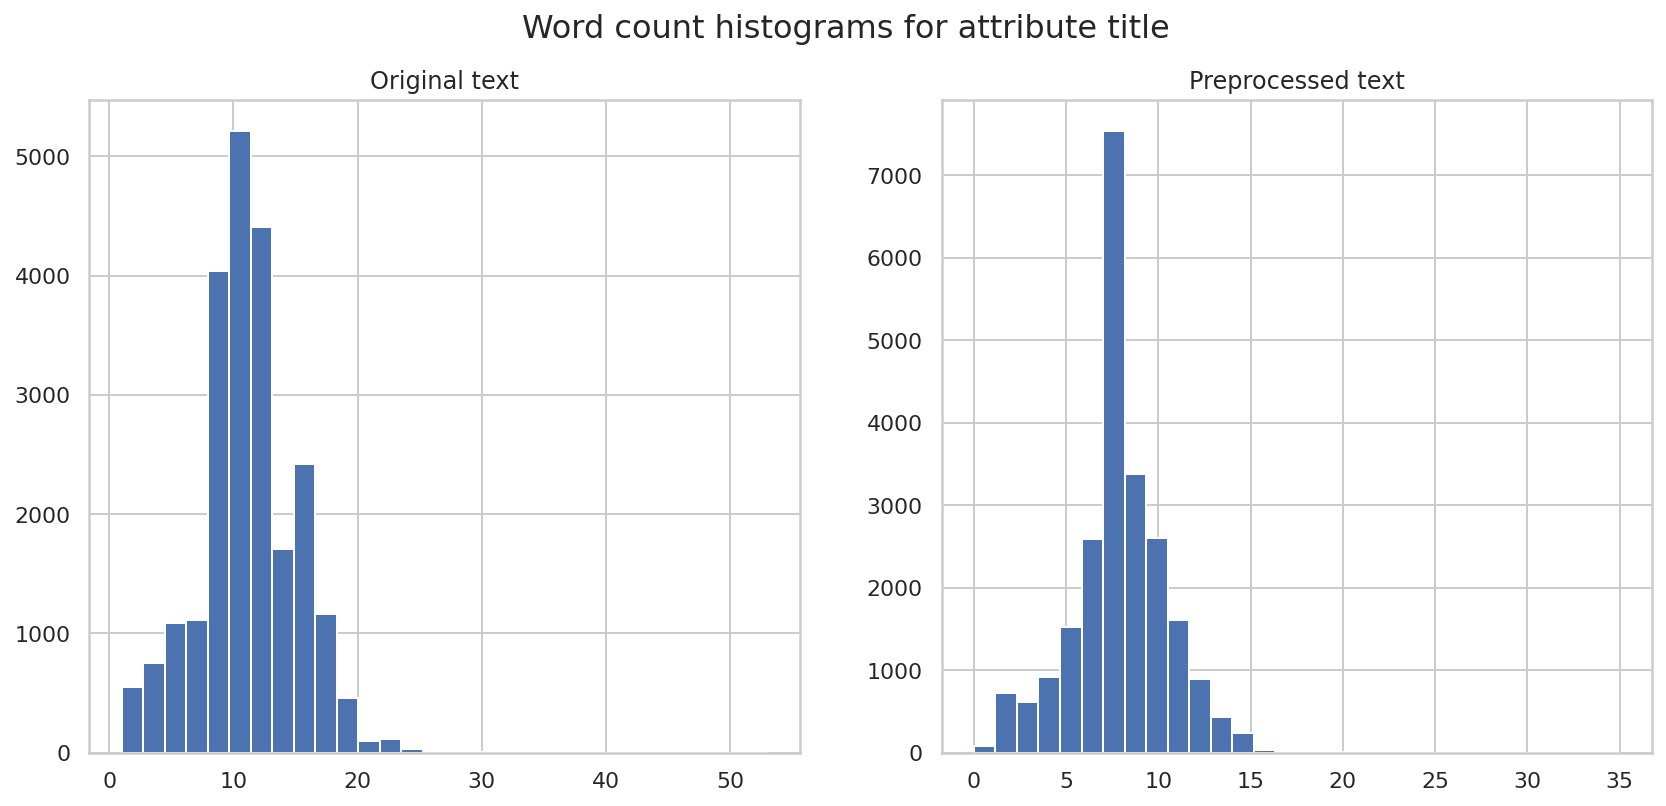

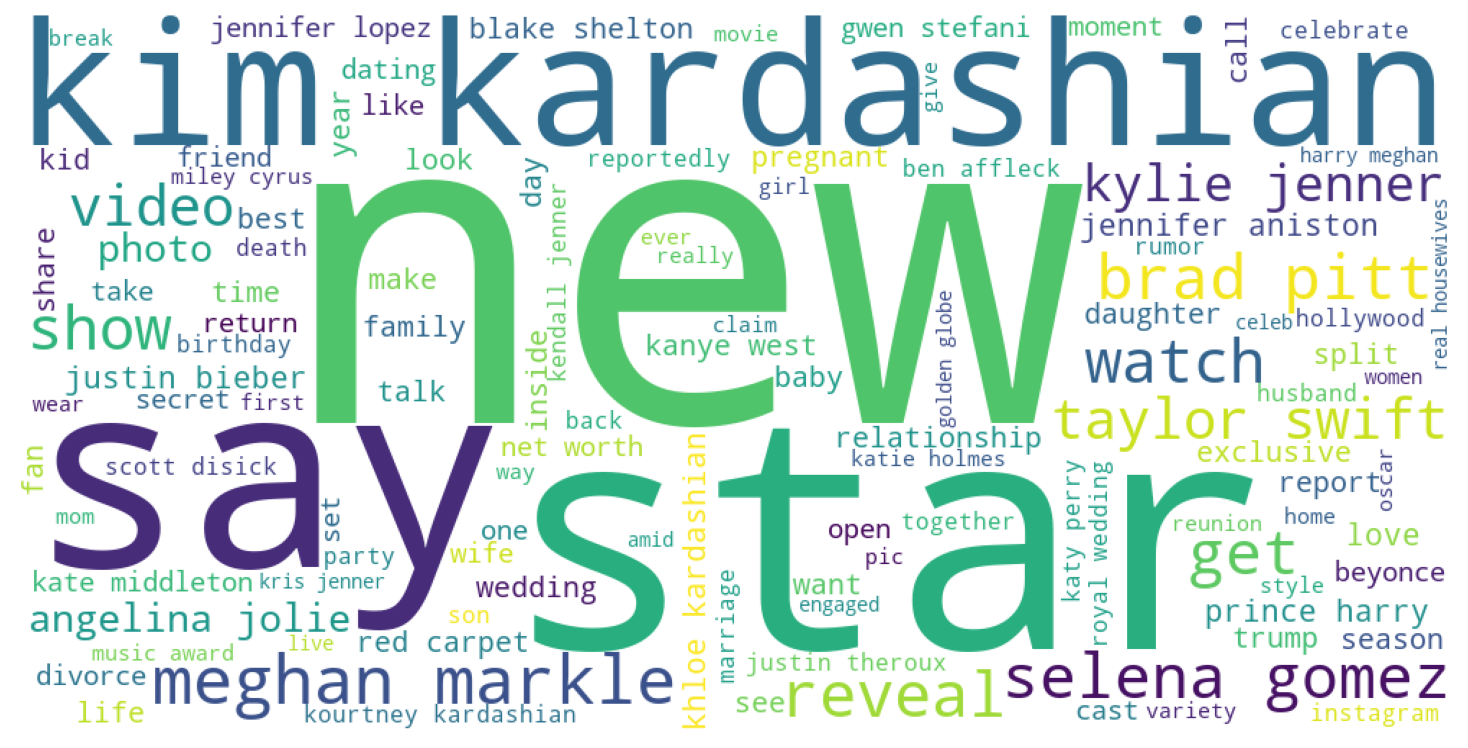



Analysis of attribute "news_url"


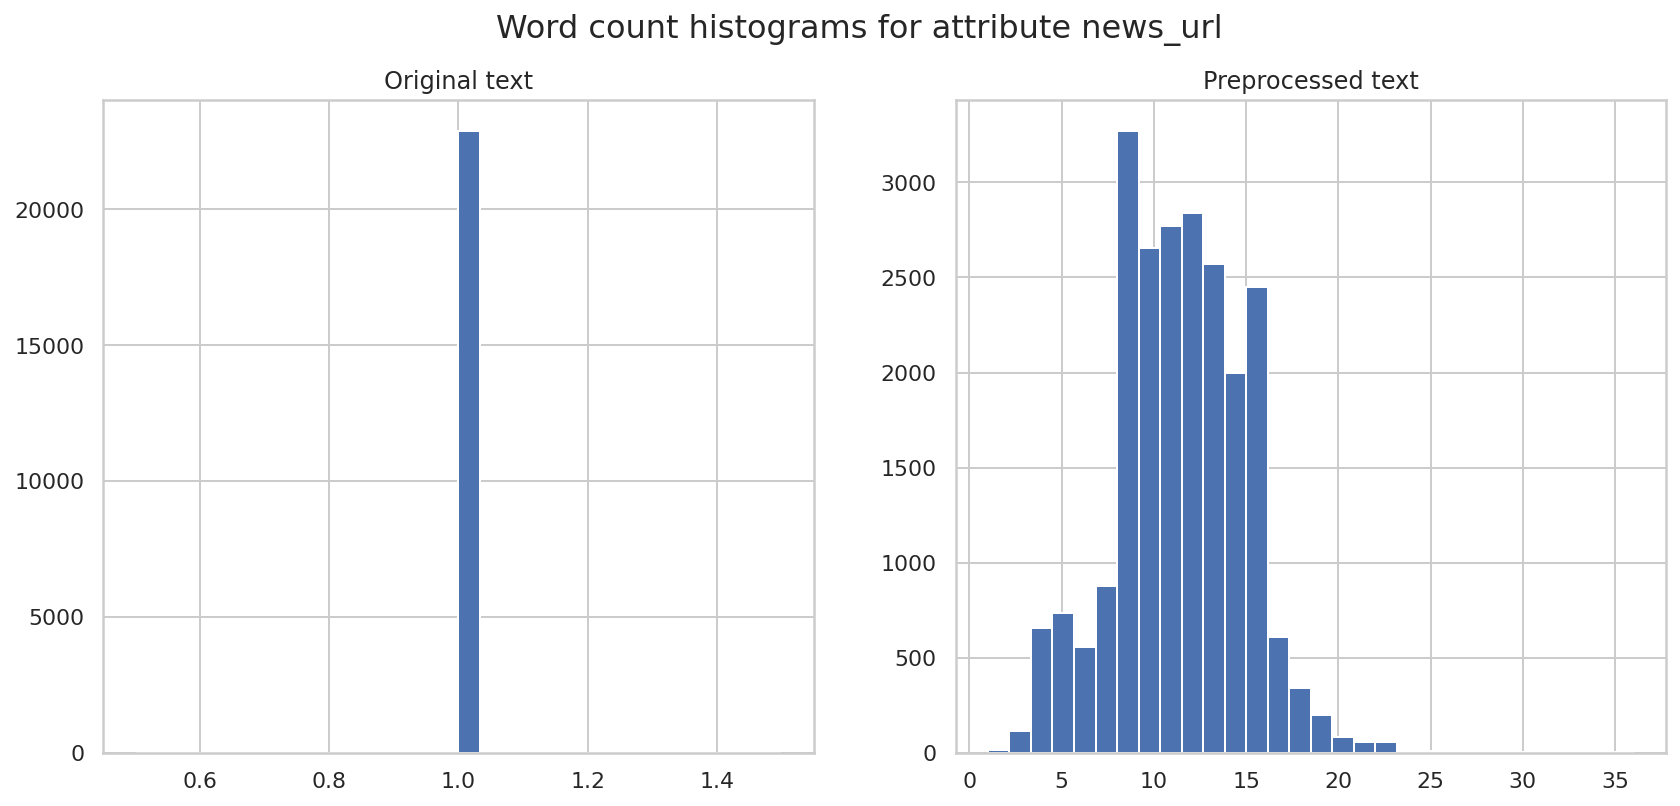

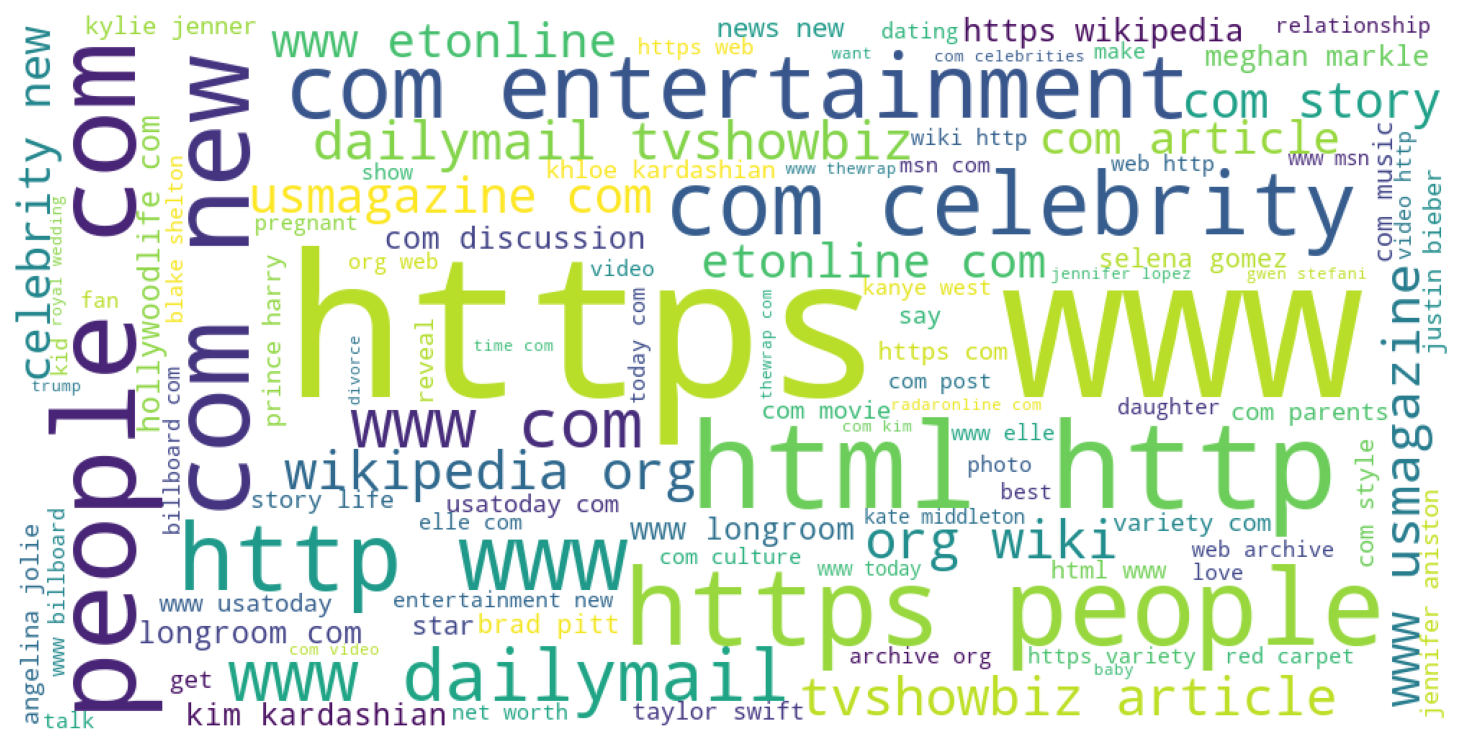

In [18]:
analyse_textual_attributes(df, textual_attributes)

## Pairwise analysis

Pairwise analysis of attributes (numerical attributes):

### Pair analysis

In [19]:
if numerical_attributes and len(numerical_attributes) > 1:
    sns.pairplot(df, vars=numerical_attributes, hue=label_column);

### Correlations

Correlation matrix:

In [20]:
if numerical_attributes and len(numerical_attributes) > 1:
    check_correlations(df, numerical_attributes)